# Graph of technical failures

In [4]:
import pandas as pd
import numpy as np

def add_leading_zero(num: int) -> str:
    return str(num).zfill(2)

In [5]:
data_folder_2_day_cutoff="s3://prm-gp2gp-transfer-data-preprod/v11/cutoff-2"
transfer_parquet_files_2_day_cutoff_1 = [f"{data_folder_2_day_cutoff}/2022/01/{add_leading_zero(day)}/2022-01-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_2 = [f"{data_folder_2_day_cutoff}/2022/02/{add_leading_zero(day)}/2022-02-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 29)]
transfer_parquet_files_2_day_cutoff_3 = [f"{data_folder_2_day_cutoff}/2022/03/{add_leading_zero(day)}/2022-03-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_4 = [f"{data_folder_2_day_cutoff}/2022/04/{add_leading_zero(day)}/2022-04-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 31)]
transfer_parquet_files_2_day_cutoff_5 = [f"{data_folder_2_day_cutoff}/2022/05/{add_leading_zero(day)}/2022-05-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_6 = [f"{data_folder_2_day_cutoff}/2022/06/{add_leading_zero(day)}/2022-06-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 31)]
transfer_parquet_files_2_day_cutoff_7 = [f"{data_folder_2_day_cutoff}/2022/07/{add_leading_zero(day)}/2022-07-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_8 = [f"{data_folder_2_day_cutoff}/2022/08/{add_leading_zero(day)}/2022-08-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_9 = [f"{data_folder_2_day_cutoff}/2022/09/{add_leading_zero(day)}/2022-09-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 31)]
transfer_parquet_files_2_day_cutoff_10 = [f"{data_folder_2_day_cutoff}/2022/10/{add_leading_zero(day)}/2022-10-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 32)]
transfer_parquet_files_2_day_cutoff_11 = [f"{data_folder_2_day_cutoff}/2022/11/{add_leading_zero(day)}/2022-11-{add_leading_zero(day)}-transfers.parquet" for day in range(1, 8)]

transfers_raw_2_day_cutoff_1 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_1])
transfers_raw_2_day_cutoff_2 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_2])
transfers_raw_2_day_cutoff_3 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_3])
transfers_raw_2_day_cutoff_4 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_4])
transfers_raw_2_day_cutoff_5 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_5])
transfers_raw_2_day_cutoff_6 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_6])
transfers_raw_2_day_cutoff_7 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_7])
transfers_raw_2_day_cutoff_8 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_8])
transfers_raw_2_day_cutoff_9 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_9])
transfers_raw_2_day_cutoff_10 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_10])
transfers_raw_2_day_cutoff_11 = pd.concat([pd.read_parquet(file) for file in transfer_parquet_files_2_day_cutoff_11])

In [6]:
transfers_raw_2_day_cutoff = pd.concat(
    [
        transfers_raw_2_day_cutoff_1,
        transfers_raw_2_day_cutoff_2,
        transfers_raw_2_day_cutoff_3,
        transfers_raw_2_day_cutoff_4,
        transfers_raw_2_day_cutoff_5,
        transfers_raw_2_day_cutoff_6,
        transfers_raw_2_day_cutoff_7,
        transfers_raw_2_day_cutoff_8,
        transfers_raw_2_day_cutoff_9,
        transfers_raw_2_day_cutoff_10,
        transfers_raw_2_day_cutoff_11
    ])

In [7]:
total_transfers = transfers_raw_2_day_cutoff.shape[0]
total_transfers

2255295

# Summary
## 2 day cutoff

In [8]:
two_day = transfers_raw_2_day_cutoff.value_counts("status")
two_day

status
Integrated on time      1504659
Process failure          630861
Technical failure        109780
Unclassified failure       9995
dtype: int64

In [9]:
two_day_percentage = transfers_raw_2_day_cutoff.value_counts("status").apply(lambda x: (x / total_transfers)) * 100
two_day_percentage

status
Integrated on time      66.716727
Process failure         27.972438
Technical failure        4.867656
Unclassified failure     0.443179
dtype: float64

In [10]:
transfers_raw_2_day_cutoff['day'] = transfers_raw_2_day_cutoff['date_requested'].dt.to_period('D')
transfers_raw_2_day_cutoff['week'] = transfers_raw_2_day_cutoff['date_requested'].dt.to_period('W')
grouped_2_day_transfers = transfers_raw_2_day_cutoff.groupby("day").agg({'conversation_id':'count'}).reset_index()
# grouped_2_day_transfers

In [11]:
technical_failure_2_day_cutoff_bool = transfers_raw_2_day_cutoff["status"] == "Technical failure"
technical_failure_2_day_cutoff_bool = transfers_raw_2_day_cutoff[technical_failure_2_day_cutoff_bool]
grouped_technical_failure_2_day_cutoff = technical_failure_2_day_cutoff_bool.groupby("day").agg({'conversation_id':'count'}).reset_index()

# grouped_technical_failure_2_day_cutoff

In [12]:
merged_grouped_2_day_transfers = grouped_2_day_transfers.merge(grouped_technical_failure_2_day_cutoff, left_on="day", right_on="day", how="outer")
merged_grouped_2_day_transfers['percentage'] = (merged_grouped_2_day_transfers['conversation_id_y'] / merged_grouped_2_day_transfers['conversation_id_x']) * 100

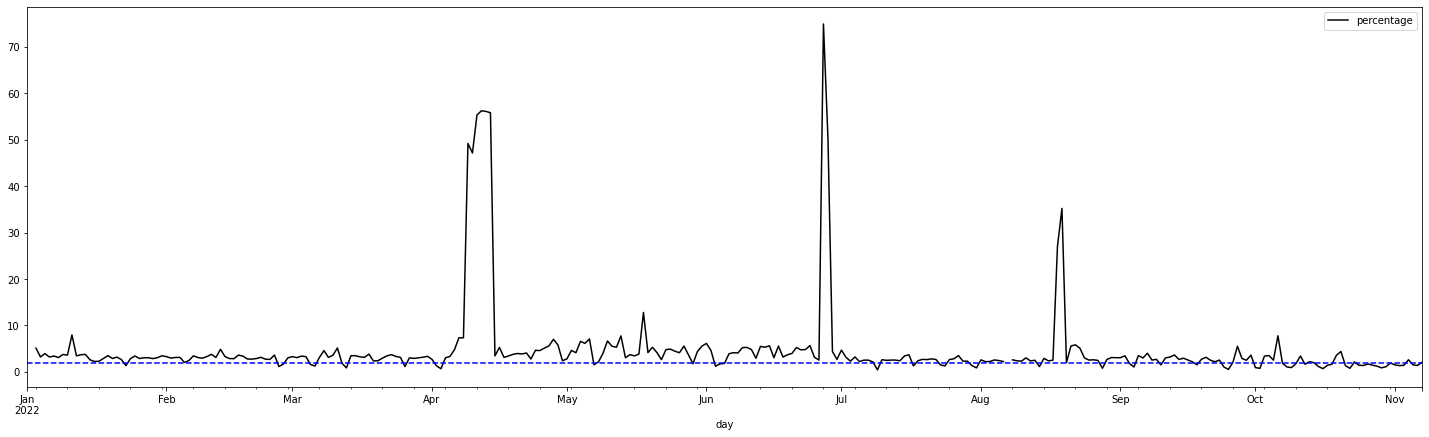

In [18]:
merged_grouped_2_day_transfers.plot(color="black", x="day", y="percentage", figsize=(25,7)).axhline(y=2, color='b', linestyle='--')

In [15]:
merged_grouped_2_day_transfers["percentage"].describe()

count    309.000000
mean       4.705656
std        8.842656
min        0.432900
25%        2.366864
50%        3.047896
75%        3.838571
max       74.934235
Name: percentage, dtype: float64

In [47]:
merged_grouped_2_day_transfers_rounded = merged_grouped_2_day_transfers.copy()
merged_grouped_2_day_transfers_rounded["percentage"] = merged_grouped_2_day_transfers_rounded["percentage"].round(2).fillna(0)

In [48]:
pd.set_option('display.max_rows', 200)
merged_grouped_2_day_transfers_rounded.set_index("day", inplace=True, drop=True)
# merged_grouped_2_day_transfers_rounded[["percentage"]]

In [49]:
count_of_errors_more_than_5_bool = merged_grouped_2_day_transfers_rounded["percentage"] > 10
merged_grouped_2_day_transfers_rounded[count_of_errors_more_than_5_bool].count()

conversation_id_x    11
conversation_id_y    11
percentage           11
dtype: int64

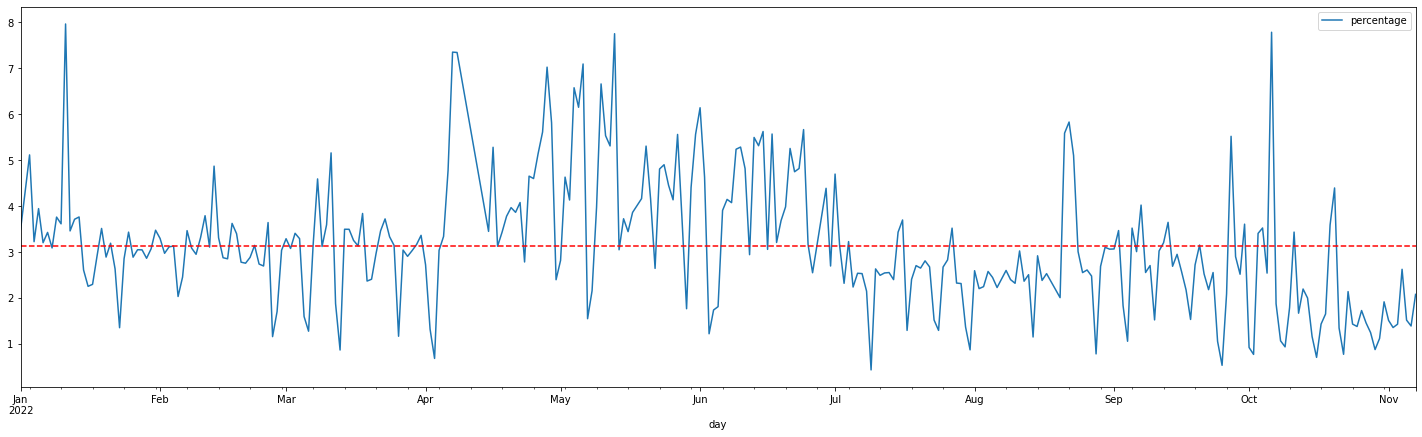

In [64]:
threshold_percent = 10
merged_grouped_2_day_transfers_less_than_threshold_bool = merged_grouped_2_day_transfers["percentage"] < threshold_percent
merged_grouped_2_day_transfers_less_than_threshold = merged_grouped_2_day_transfers[merged_grouped_2_day_transfers_less_than_threshold_bool]
merged_grouped_2_day_transfers_less_than_threshold.plot(x="day", y="percentage", figsize=(25,7)).axhline(y=np.nanmean(merged_grouped_2_day_transfers_less_than_threshold["percentage"]), color='r', linestyle='--', label='average')


In [ ]:
merged_grouped_2_day_transfers_less_than_threshold.plot.bar(x="week", y="percentage", figsize=(25,7))